In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")

In [3]:
FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [4]:
FS_data_arr

array([['105', '109', '22', '108', '59', '67', '214', '112', '126',
        '195', '23', '119', '38', '191', '15', '241', '31', '25', '242',
        '233', '211', '20', '54', '74', '86', '131', '111', '120', '94',
        '27', '63', '234', '11', '175', '49', '196', '51', '64', '13',
        '146', '46', '134', '61', '231', '124', '1', '34', '188', '95',
        '158', '16', '101', '41', '113', '35', '167', '189', '70', '75',
        '39', '174', '139', '129', '24', '26', '236', '212', '52', '65',
        '4', '116', '123', '152', '19', '198', '154', '56', '114', '173',
        '28', '171', '160', '147', '40', '100', '162', '165', '137',
        '36', '106', '121', '199', '42', '73', '170', '66', '176', '238',
        '140', '91'],
       ['15.775058', '12.94325', '12.422071', '11.785842', '11.392973',
        '11.207942', '10.809022', '10.670991', '10.513817', '10.493874',
        '10.169013', '10.131613', '10.128791', '10.112448', '10.041941',
        '9.986999', '9.972515', '9.91577

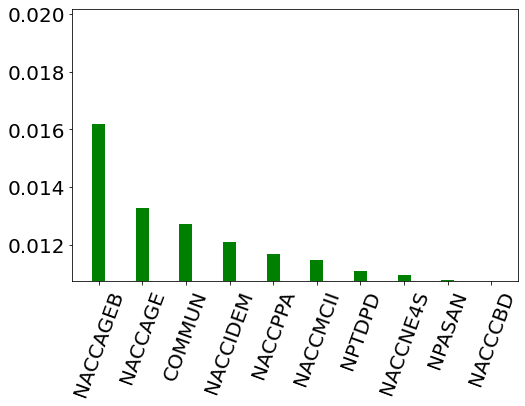

In [5]:
import matplotlib.pyplot as plt
import numpy as np

used_number_features=10

fz=20
params = {
    'figure.figsize': '8, 5'
}
plt.rcParams.update(params)

'''
FS_data_arr_=((FS_data_arr[1,:]).astype(float))
FS_data_arr_used=(FS_data_arr_-np.min(FS_data_arr_))/(np.max(FS_data_arr_)-np.min(FS_data_arr_))

labels=FS_data_arr[-1,:][0:used_number_features]
data=FS_data_arr_used[0:used_number_features]
width=0.3
'''

FS_data_arr_=((FS_data_arr[1,:]).astype(float))
FS_data_arr_used=FS_data_arr_/np.sum(FS_data_arr_)

labels=FS_data_arr[-1,:][0:used_number_features]
data=FS_data_arr_used[0:used_number_features]
width=0.3

Max_Samples=np.max(data)+0.004
Min_Samples=np.min(data)

for i in np.arange(len(data)):
    rects_1=plt.bar(i,data[i],width,label=labels[0],color='green')
plt.title('')
plt.ylim(Min_Samples,Max_Samples)
plt.yticks(fontsize=fz)
plt.xticks(np.arange(len(data)),labels,fontsize=fz,rotation=70)
plt.xlabel('')
plt.show()